# Assignment 2 - Solution Template

**Course:** SYSCC 4906 - Introduction to Machine Learning

**Semester:** Fall 2020

**Student Name:** William Ma, Joshua Wang

**Student Number:**  101004624, 101014864

---

#DeepPurpose Collab Setup

Before implementing and answering the questions below, ensure that these DeepPurpose Collab Setup steps are run correctly to avoid problems later on.

**Note:** Second to last step (rdkit installation) requires user input. Enter `y` and press `Enter`.

In [ ]:
!echo $PYTHONPATH

In [ ]:
%env PYTHONPATH=

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))
_ = (sys.path.append("/content/DeepPurpose/"))

In [ ]:
!conda install --channel conda-forge featuretools --yes

In [ ]:
!git clone https://github.com/kexinhuang12345/DeepPurpose.git

In [ ]:
%%bash
cd /content/DeepPurpose/
echo -y | conda env create -f environment.yml
source activate DeepPurpose

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus pandas-flavor==0.1.0 subword-nmt lifelines wget 

In [ ]:
!conda install -c rdkit rdkit 

In [ ]:
import os
os.chdir('/content/DeepPurpose/')

**Sanity Check:** If thes two modules below load without error, you aare good to go! *(Warnings are okay)*.

In [4]:
import DeepPurpose.utils
import DeepPurpose.dataset
import warnings
warnings.filterwarnings("ignore")

# Assignment Questions

Complete the following sections by referencing the the DeepPurpose documentation. 

Where there is a `TODO` placeholder, fill in your solution.

---

**Step 0:** Ensure that the DeepPurpose library was properly loaded. *There shouldnt be any errors when running the next cell.*


In [1]:

from DeepPurpose.dataset import *
import DeepPurpose.DTI as models
import matplotlib.pyplot as plt
import pandas as pd
from utils_inspire import *

**Step 1:** Load the DAVIS Dataset where the target value is in binary based on a threshold value for the binding affinity scores of 30. Print out the total number of elements **and** first value of `X_drug`, `X_target`, and `y`.

Plot the distribution of `y` (should be a histogram for class 0 vs. class 1 with 2 bins and a title with the percentage of positives).

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!
The total number of elements in the dataset is 30056
1st element of X_drug: CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N
1st element of X_target: MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLN

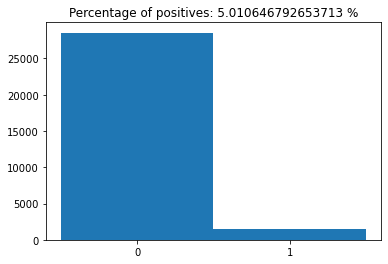

In [2]:
X_drug, X_target, y  = load_process_DAVIS(path = './data', binary = True, convert_to_log = True, threshold = 30)

assert X_drug.shape[0] == X_target.shape[0] and X_target.shape[0] == y.shape[0]
print(f"The total number of elements in the dataset is {X_drug.shape[0]}")
print(f"1st element of X_drug: {X_drug[0]}")
print(f"1st element of X_target: {X_target[0]}")
print(f"1st element of y: {y[0]}")

fig, ax = plt.subplots()
ax.hist(y, bins=2)
ax.set_title(f"Percentage of positives: {y.sum() * 100 / y.shape[0]} %")
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(('0', '1'))
plt.show()

**Step 2:** Encode both the SMILES and targets using the `CNN`-based encodings for feature representations. [(Hint!)](https://github.com/kexinhuang12345/DeepPurpose#encodings)

Split the dataset into a training:validation:test sets by fractions 60:20:20 and ensuring none of the SMILES or Protein sequences in the test set appear in the training or validation sets.

Print out the first representation of the first training SMILE and Protein sequences. (Hint: `train.colums`)

In [3]:
drug_encoding, target_encoding = 'CNN', 'CNN_inspire'
#ensure none of test smiles appears in set
train, val, test  = data_process(X_drug, X_target, y, 
                      drug_encoding, target_encoding, 
                      split_method='cold_drug',frac=[0.6,0.2,0.2],
                      random_seed = 42)
# train.head()
print(f"First SMILE representation: \n{train.drug_encoding.iloc[0]}")
print(f"First target representation: \n{train.target_encoding.iloc[0]}")

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.
First SMILE representation: 
['C', 'C', '(', 'C', ')', '(', 'C', ')', 'C', '1', '=', 'C', 'C', '(', '=', 'N', 'O', '1', ')', 'N', 'C', '(', '=', 'O', ')', 'N', 'C', '2', '=', 'C', 'C', '=', 'C', '(', 'C', '=', 'C', '2', ')', 'C', '3', '=', 'C', 'N', '4', 'C', '5', '=', 'C', '(', 'C', '=', 'C', '(', 'C', '=', 'C', '5', ')', 'O', 'C', 'C', 'N', '6', 'C', 'C', 'O', 'C', 'C', '6', ')', 'S', 'C', '4', '=', 'N', '3', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
First target representation: 
[11 18 18 ...  0  0  0]


In [4]:
for i in train.target_encoding.iloc[0]:
    print(i)

11
18
18
5
5
14
12
16
16
15
10
19
19
12
19
3
19
12
19
12
12
19
19
19
19
12
13
12
19
3
19
12
19
7
2
19
16
4
5
19
2
19
16
10
10
4
13
4
14
15
4
3
1
15
19
19
5
1
2
4
5
3
4
16
13
12
8
19
11
18
9
1
3
18
16
11
5
4
8
8
15
17
14
3
10
4
9
18
16
15
2
10
2
11
16
14
3
12
19
17
18
8
2
4
19
7
2
14
12
12
2
8
8
4
12
12
19
14
4
6
15
4
3
2
3
11
14
5
9
16
19
19
10
4
4
8
3
11
8
10
16
3
10
13
19
5
13
15
8
15
4
3
10
2
5
9
14
13
9
15
1
4
1
16
3
17
10
9
18
13
20
2
2
17
16
14
3
18
4
15
8
2
3
3
17
14
16
19
17
7
4
3
9
14
5
19
12
1
13
8
18
5
10
8
20
10
13
15
19
4
8
1
4
15
14
15
2
18
18
7
13
13
3
12
7
16
1
20
15
11
4
8
3
7
12
19
18
2
2
13
13
18
1
14
2
6
1
3
19
9
3
3
7
18
3
9
7
5
13
3
20
5
19
15
12
10
4
1
2
9
14
19
8
5
13
2
20
14
8
12
16
7
12
10
14
11
17
9
3
2
16
7
11
3
15
20
14
20
14
18
16
20
14
2
7
10
4
12
7
5
12
5
18
3
3
18
18
15
9
20
2
20
8
4
10
8
12
20
2
20
1
18
3
20
15
20
4
18
1
12
15
1
1
1
18
18
13
10
20
18
1
16
3
13
14
20
2
20
13
13
15
13
12
2
1
20
16
10
16
20
18
1
19
10
13
10
20
8
20
19
2
3
20
2
10
20
1
3
1

In [5]:
SMILES_lengths = [len(SMILES) for SMILES in train.SMILES.to_numpy()]
Target_lengths = [len(SMILES) for SMILES in train['Target Sequence'].to_numpy()]

**Step 3:** In two subplots, plot a distribution of **sequence lengths** for all SMILE sequences (subplot 1) and all protein sequences (subplot 2) in the training set. 

Index(['SMILES', 'Target Sequence', 'Label', 'drug_encoding',
       'target_encoding'],
      dtype='object')


(array([3720., 5080., 2960., 2720., 2400.,  360.,  160.,  120.,    0.,
         160.]),
 array([ 244. ,  474.5,  705. ,  935.5, 1166. , 1396.5, 1627. , 1857.5,
        2088. , 2318.5, 2549. ]),
 <BarContainer object of 10 artists>)

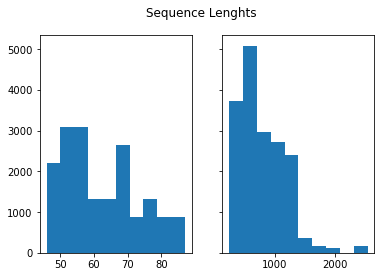

In [6]:


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Sequence Lenghts')
print(train.columns)
X_drug.shape
ax1.hist(SMILES_lengths)
ax2.hist(Target_lengths)

**Step 4:** Generate the configuration that implements the DeepDTA model. ([Hint](https://github.com/kexinhuang12345/DeepPurpose/blob/master/DEMO/CNN-Binary-Example-DAVIS.ipynb), [Source](https://arxiv.org/abs/1801.10193))
* Hidden Dimensions in order: 1024, 1024, 512
* Drug Filters in order: 32, 64, 96
* Target Filters in order: 32, 64, 96
* Drug Kernels in order: 4, 6, 8
* Target Kernels in order: 4, 8, 12
* Learning Rate: 0.001
* Training Epochs: 100

Train and test the model.

In [7]:
from inspire_encoder import InspireEncoder
config = {'inspire_activation': 'relu',
            'CNN_inspire_filters': 128,
            'protein_strides': [10, 15, 20, 25, 30],
            'inspire_dropout': 0.2,
            'protein_layers': [128] }
encoder = DeepConvDTI(**config)
encoder.cuda()
encoder(torch.from_numpy(np.vstack(train.target_encoding.values[0:2])))[0].shape

torch.Size([128])

In [29]:
np.vstack(train.target_encoding.values[0:2])

array([[11, 18, 18, ...,  0,  0,  0],
       [20,  5,  6, ...,  0,  0,  0]])

In [ ]:
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )
model = models.model_initialize(**config)
print(model)

In [ ]:

model.train(train, val, test)

**Step 5:** Report what the final test AUROC, AUPRC, and F1 values are:
* Test AUROC: 0.67965
* Test AUPRC: 0.12314
* Test F1: 0.0

Briefly describe what each of these metrics represents:
* Test AUROC: This is the area under roc curve. The greater the area, the higher the true positive rate can be while maintaining a low false positive rate, making for a better classifier
* Test AUPRC: This is the area under the Precision-Recall curve. The higher the value, the less tradeoff we have to make between precision and recall.
* Test F1: The harmonic mean of precision and recall.

**Step 6:** With referrence to the configuration from **Step 4**, modify the configuration in such a way that might *improve* test perfromance. Briefly describe what changes you made and briefly justify that choice: 

**What parameters did you modify and why:**  I added an additional layer to both cnns. By making it deeper I hope that the encoders will be able to extract more information from the data. I also decreased the batch size in the hopes that the model would generalize better.

Experimentally determine whether your model modifications did or did not improve performance by training the model and comparing performance of the model above.

In [ ]:
new_config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 32,
                         cnn_drug_filters = [32,64,96,128],
                         cnn_target_filters = [32,64,96,128],
                         cnn_drug_kernels = [4,6,8,10],
                         cnn_target_kernels = [4,8,12,16],
                         num_workers = 2
                        )
new_model = models.model_initialize(**new_config)
new_model.train(train, val, test)

**Step 7:** Report the **difference** in your new model performance compared to the original model performance. Lesser performance should be a negative value; greater performance should be a positive value.

* Diff. Test AUROC: `-0.05685`
* Diff. Test AUPRC: `-0.04216`
* Diff. Test F1: `0.00645`

# FIN